In [7]:
# 导入依赖库
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#加载数据
#读取过程用python编译
data = pd.read_csv('xiaomidata.csv')

## 1.数据探索和问题分析


### 编程练习
打印数据集的前5行数据

In [8]:
# TODO：打印data的前五行数据
data.head(5)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X19,X20,X21,X22,X23,front,left,right,back,label
0,0.984,1.421,2.548,2.544,2.714,5.000,5.000,3.202,3.192,2.689,...,0.398,0.850,0.853,0.940,0.968,1.671,0.398,2.714,0.940,3
1,2.611,3.102,5.000,5.000,5.000,1.644,1.584,1.564,1.574,2.656,...,0.652,0.660,5.000,1.353,1.902,0.882,0.652,1.564,1.353,2
2,0.482,1.523,1.413,1.393,1.404,1.420,1.451,2.639,2.659,3.265,...,0.455,0.432,0.426,0.434,0.472,0.869,0.455,1.404,0.434,2
3,1.773,1.818,2.751,1.963,1.953,1.970,2.459,2.004,2.424,1.967,...,0.579,0.754,1.754,1.743,1.752,1.952,0.579,1.953,1.743,1
4,1.083,1.777,3.225,5.000,5.000,1.909,1.988,1.840,5.000,1.793,...,0.493,1.041,1.013,1.025,1.056,1.541,0.452,1.840,1.025,3


In [12]:
len(data)

4865

### 编程练习
统计数据中的缺失值的数量
- 统计数据集有多少行有缺失
- 统计数据集有多少列有缺失

In [4]:
# TODO：统计数据集中有多少行、列存在缺失
print(((data.isnull()).sum(axis=1)>0).sum())
print(((data.isnull()).sum(axis=0)>0).sum())

0
0


### 编程练习
统计数据中的重复样本的数量
- 统计数据集有多少行重复

In [5]:
# TODO：统计数据集中有多少行重复
data.duplicated().sum()

0

## 2.清洗数据
### 编程练习
查看data数据集中标签('Class')的分布

In [7]:
# TODO：查看data数据中Class的各类别比例
data['label'].value_counts()

1    1964
2    1860
3     737
4     304
Name: label, dtype: int64

使用describe函数查看data数据集中各列特征的分布
<br><br>
对结果使用转置可一次性展示

In [8]:
# TODO：用表格描述数据中特征的分布
data.drop(['label'],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
X0,4865.0,1.467605,0.798470,0.400,0.918,1.333,1.814,5.000
X1,4865.0,2.336053,1.419971,0.437,1.361,1.905,2.724,5.021
X2,4865.0,2.493576,1.255008,0.470,1.535,2.057,2.751,5.029
X3,4865.0,2.803572,1.314571,0.833,1.730,2.457,4.118,5.017
X4,4865.0,2.954102,1.338348,1.120,1.770,2.667,4.306,5.000
X5,4865.0,2.889923,1.280778,1.114,1.784,2.679,3.831,5.000
X6,4865.0,3.348780,1.414048,1.122,1.930,3.225,5.000,5.008
X7,4865.0,2.535988,1.107462,0.859,1.617,2.173,3.184,5.087
X8,4865.0,3.118992,1.354821,0.836,1.798,2.798,5.000,5.000
X9,4865.0,2.828909,1.303520,0.810,1.636,2.681,3.491,5.022


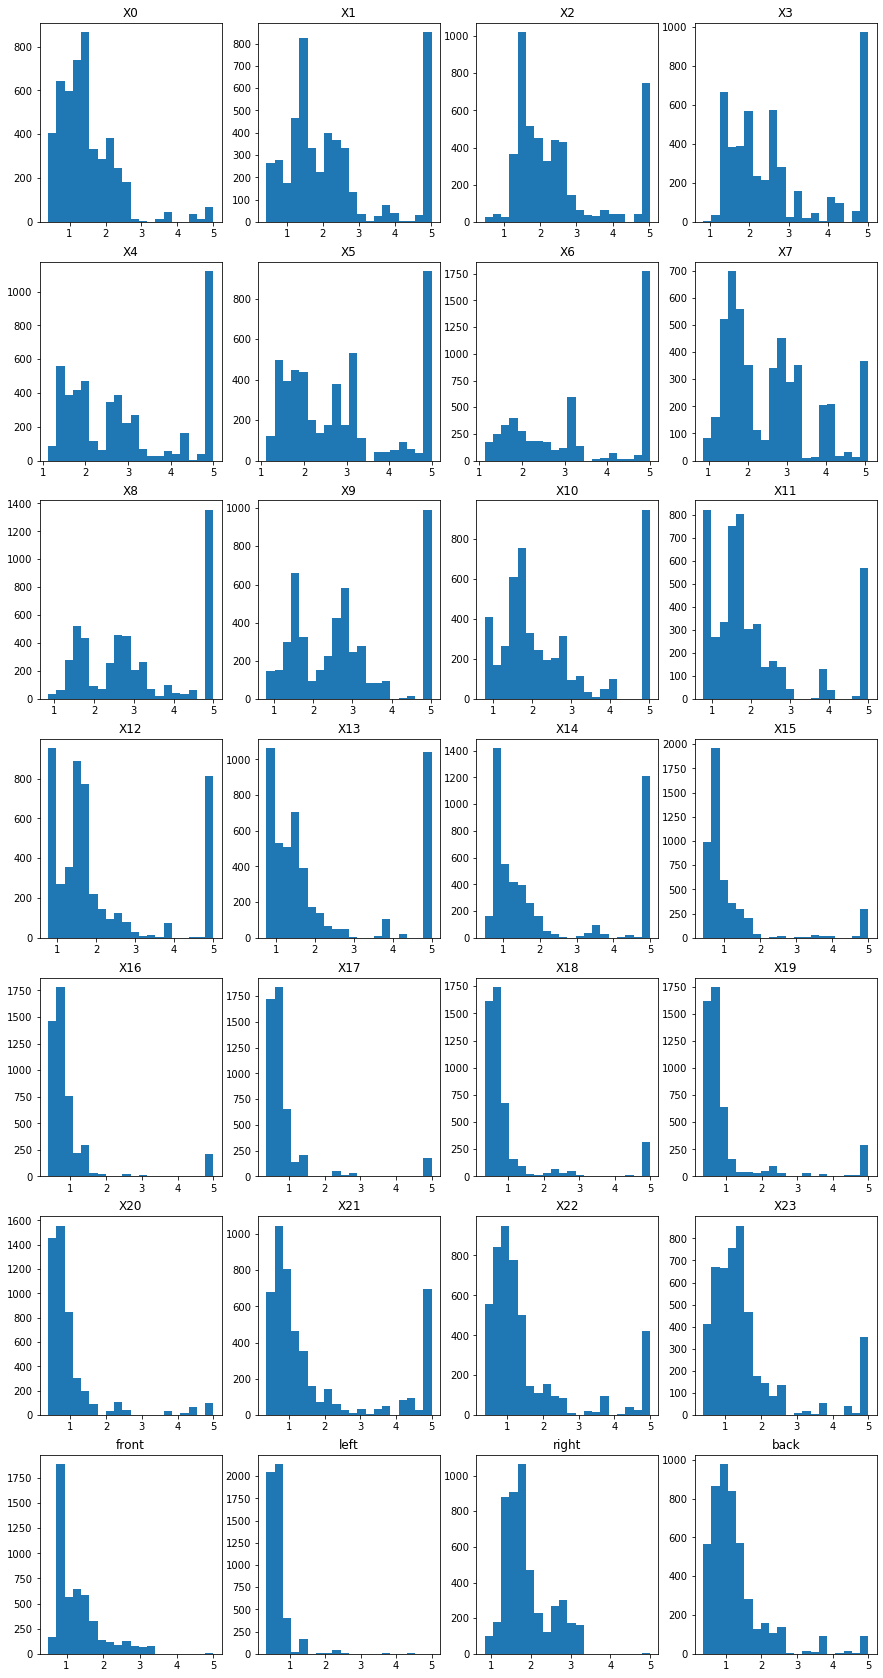

In [10]:
# TODO：画出特征分布的直方图
fig = plt.figure(figsize=(15,30))
features = list(data.drop(['label'],axis=1).columns)
for i,col in enumerate(features):
    axe = fig.add_subplot(np.ceil(len(features)/4),4,i+1)   
    axe.hist(data[col],bins=20);
    plt.title(col)

## 3.特征工程
通过观察数据我们发现：

- 数据的量纲差距不大。
- 数据不存在重复和缺失。
- 特征均为连续值。


首先分离特征和标签，并划分训练集和测试集，命名为X_train，X_test，y_train，y_test

In [11]:
# TODO： 分离特征和标签，并按要求划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop(['label'],axis=1),data['label'],test_size = 0.2,random_state=0)

## 连续特征的离散化
- 方法一：使用等距离散化的方法，将连续特征按固定间隔分组
- 方法二：使用等频离散化的方法，将连续特征按固定样本数分组

方法一:<br>
函数一是equal_distance_cut，他记录数据集分成几份时的界值，data为数据集，bins为份数<br>
函数二是apply_on_train_and_test，他调用函数一记录训练集中的界值，并施加在训练集和测试集上进行分箱，并返回分箱后的训练集和测试集

In [12]:
# 方法一示例
def equal_distance_cut(data,bins):
    Cutpoint = {}
    for i in range(len(data.columns)):
        cut = (np.max(data.iloc[:,i])-np.min(data.iloc[:,i]))/bins
        Cutpointlist = []
        for j in range((bins-1)):
            cutpoint = np.min(data.iloc[:,i]) + (j+1)*cut
            Cutpointlist.append(cutpoint)
        Cutpoint[i] = Cutpointlist
    return Cutpoint
def apply_on_train_and_test(train, test, bins):
    Cutpoint = equal_distance_cut(train,10)
    train_set = pd.DataFrame(np.zeros_like(train),columns=train.columns,index=train.index)
    test_set = pd.DataFrame(np.zeros_like(test),columns=test.columns,index=test.index)
    for i in range(len(train.columns)):
        for j in range((bins-1)):
            train_set.iloc[:,i][train.iloc[:,i] > Cutpoint[i][j]]=j
    for i in range(len(test.columns)):
        for j in range((bins-1)):
            test_set.iloc[:,i][test.iloc[:,i] > Cutpoint[i][j]]=j
    return train_set, test_set
X_train_split_1, X_test_split_1 = apply_on_train_and_test(X_train, X_test, 10)                   

方法二:<br>
函数equal_frequency_cut将数据排序后分成数份，train和test为数据集，bins为份数，并返回分箱后的训练集和测试集

In [13]:
# 方法二示例
def equal_frequency_cut(train, test, bins):
    train_set = train.copy()
    test_set = test.copy()
    edages = pd.Series([i/bins for i in range(bins)]) 
    for col in train.columns:
        train_set[col] = train_set[col].rank(pct=1).astype(float).apply(lambda x: (edages >= x).argmax())
    for col in test.columns:
        test_set[col] = test_set[col].rank(pct=1).astype(float).apply(lambda x: (edages >= x).argmax())
    return train_set, test_set
X_train_split_2, X_test_split_2 = equal_frequency_cut(X_train, X_test, 10) 

### 特征过滤

- 可以选择在特征过滤前进行必要的数据规整

#### 思路1.使用PCA进行降维

In [14]:
#对训练集和测试集使用PCA进行降维,注意应自行决定保留特征数目
from sklearn.decomposition import PCA
pca = PCA(25)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#### 思路2.使用随机森林方法进行特征选择

In [15]:
# TODO：使用一种方法进行特征选择
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=15,max_depth=10,n_estimators=1024,n_jobs=-1,random_state=0)
rf.fit(X_train,y_train)
imp = np.argsort(rf.feature_importances_)[::-1]
imp_slct = imp[:25]
X_train_slct=pd.DataFrame(X_train).iloc[:,imp_slct]

---
## 4. 选择模型进行交叉验证和网格搜索


- 使用分类模型。
- 注意模型对数据规整的需求。

In [16]:
## TODO：模型选择、交叉验证、网格搜索
clf_model = None

这里以pca降维后的数据拟合随机森林模型作为演示:

In [17]:
# 分类模型
from sklearn.ensemble import RandomForestClassifier
clf_model = RandomForestClassifier(max_features=9,max_depth=16,n_estimators=2048,n_jobs=-1,random_state=0)
clf_model.fit(X_train_pca,y_train)

RandomForestClassifier(max_depth=16, max_features=9, n_estimators=2048,
                       n_jobs=-1, random_state=0)

In [18]:
# 分类模型测试集上效果
# auc和混淆矩阵评估

from sklearn.metrics import roc_auc_score, accuracy_score
print('分类模型：')
y_test_pred_clf = clf_model.predict_proba(X_test_pca)
y_test_pred = clf_model.predict(X_test_pca)

# 对标签one-hot编码后使用宏方法计算auc和acc，你也可以使用微方法
print('ml model auc score {:.6f}'.format(roc_auc_score(pd.get_dummies(y_test),y_test_pred_clf,average='macro')))
print('---------------')
print('ml model accuracy score {:.6f}'.format(accuracy_score(y_test,y_test_pred)))

print('\n随机模型：')
# 随机猜测函数对比
y_test_random_clf = np.random.uniform(low=0.0,high=1.0,size=(len(y_test),4))
y_test_random_pred = np.argmax(y_test_random_clf,axis=1)
print('random model auc score {:.6f}'.format(roc_auc_score(pd.get_dummies(y_test),y_test_random_clf,average='macro')))
print('---------------')
print('ml model accuracy score {:.6f}'.format(accuracy_score(y_test,y_test_random_pred)))

分类模型：
ml model auc score 0.986336
---------------
ml model accuracy score 0.895170

随机模型：
random model auc score 0.489636
---------------
ml model accuracy score 0.231244


---
## 5. 模型评价的深入思考<br>

对于多分类模型，我们需要逐类查看预测效果<br>
<br>
- 代码将所有类别的ROC曲线分别呈现，也可以修改代码将他们在一张图上呈现

<Figure size 432x288 with 0 Axes>

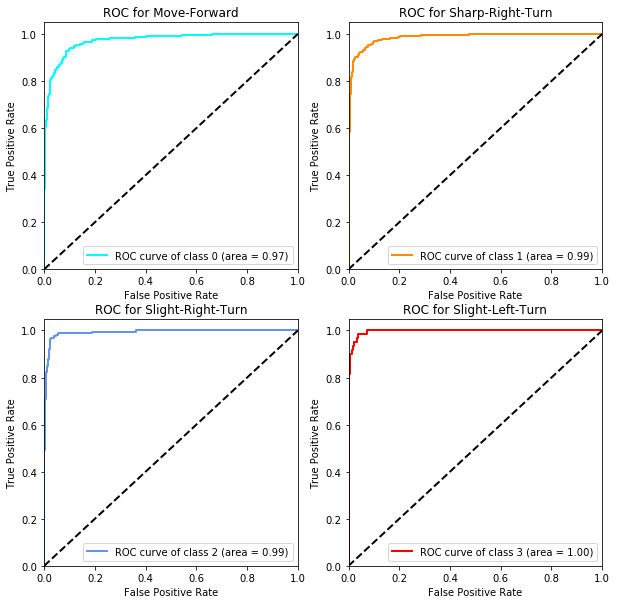

In [20]:
# 评价分类模型在测试集上预测各类别的效果
# 计算各类别fpr和tpr
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], thresholds[i] = roc_curve(pd.get_dummies(y_test).iloc[:, i], y_test_pred_clf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 将4类的ROC曲线在4张子图呈现
from itertools import cycle
# Plot all ROC curves
lw=2
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
names = ['Move-Forward','Sharp-Right-Turn','Slight-Right-Turn','Slight-Left-Turn']
fig = plt.figure(figsize=(10,10))
for i, color in zip(range(4), colors):
    axe = fig.add_subplot(2,2,i+1)
    axe.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for '+names[i])
    plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

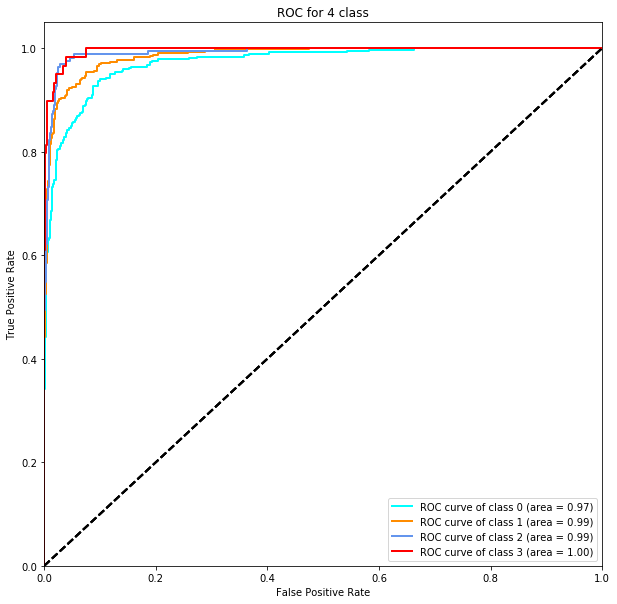

In [21]:
# 将所有类别的ROC在一张图呈现
lw=2
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
names = ['Move-Forward','Sharp-Right-Turn','Slight-Right-Turn','Slight-Left-Turn']
fig = plt.figure(figsize=(10,10))
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for 4 class')
    plt.legend(loc="lower right")
plt.show()